# Demographic health data

---

Imported Libraries

In [57]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
'''NOTE: This affects only the display and not the underlying data, which remains unchanged.'''

'NOTE: This affects only the display and not the underlying data, which remains unchanged.'

## Step 1: Problem statement and data collection

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

df.head(3)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.207,7637,13.735,6878,12.370,7089,12.750,...,3644,12.900,11.900,13.800,5462,3.100,2.900,3.300,1326,3
1,1003,218022,24757,11.355,26913,12.344,23579,10.815,25213,11.564,...,14692,12.000,11.000,13.100,20520,3.200,3.000,3.500,5479,4
2,1005,24881,2732,10.980,2960,11.897,3268,13.135,3201,12.865,...,2373,19.700,18.600,20.600,3870,4.500,4.200,4.800,887,6


**Description and types of Data**

## Step 2: Exploration and data cleaning
- ### 2.1 Summarize DF

In [59]:
# Obtain dimensions

rows, columns = df.shape

print(f"The dimensions of this dataset are: {rows} Rows and {columns} Columns")

The dimensions of this dataset are: 3140 Rows and 108 Columns


In [60]:
# Obtain information about data types and non-null values

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 108 columns):
 #    Column                                                                         Dtype  
---   ------                                                                         -----  
 0    fips                                                                           int64  
 1    TOT_POP                                                                        int64  
 2    0-9                                                                            int64  
 3    0-9 y/o % of total pop                                                         float64
 4    19-Oct                                                                         int64  
 5    10-19 y/o % of total pop                                                       float64
 6    20-29                                                                          int64  
 7    20-29 y/o % of total pop                         

In [61]:
# Check null values

null_var = df.isnull().sum().loc[lambda x: x > 0] # Number of nulls in each variable.

num_of_null_var = len(null_var) # Number of variables with almost 1 null.

print(f"{null_var}\n\nThe number of null variables are {num_of_null_var}")

Series([], dtype: int64)

The number of null variables are 0


- ### 2.2 Eliminate duplicates

In [62]:
# Obtain the number of duplicate values in our dataset

print(f"The number of duplicate values in the dataset is {df.duplicated().sum()}")

The number of duplicate values in the dataset is 0


In [63]:
first_df = df.copy()

- ### 2.3 Eliminate irrelevant information

In [64]:
# Eliminate irrelevant columns

first_df.drop(
    ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop",
              "30-39 y/o % of total pop", "40-49 y/o % of total pop", "50-59 y/o % of total pop",
               "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop",
                "% White-alone", "% Black-alone", "% NA/AI-alone", "% Asian-alone",
                  "% Hawaiian/PI-alone", "% Two or more races", "Percent of adults with less than a high school diploma 2014-18",
                   "Percent of adults with a high school diploma only 2014-18",
                    "Percent of adults completing some college or associate's degree 2014-18",
                     "Percent of adults with a bachelor's degree or higher 2014-18",
                      "Percent of Population Aged 60+", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI",
                       "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI",
                        "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI",
                         "diabetes_Upper 95% CI", "CKD_Lower 95% CI", "CKD_Upper 95% CI" ],
                    axis = "columns",
                        inplace = True
                        )

first_df.head(3)

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,15193,7.900,3345,8.600,3644,12.900,5462,3.100,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,50761,7.800,13414,8.600,14692,12.000,20520,3.200,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,8013,11.000,2159,12.100,2373,19.700,3870,4.500,887,6


In [ ]:
modification = {} # Dict with {'old names': 'new names'}

for name in first_df.columns:
    
    modification[name] = name.replace(" ", "_")

filt_df = first_df.rename(columns = modification)

## Step 3: Analysis of categorical variables

- ### 3.1 Analysis of categorical variables

In [67]:
categorical_var = []

for column in filt_df: 

    if filt_df[column].dtype == 'object':

        categorical_var.append(column)


print(f"Categorical Variables are:\n{categorical_var}\n\nTotal = {len(categorical_var)}")

Categorical Variables are:
['COUNTY_NAME', 'STATE_NAME']

Total = 2


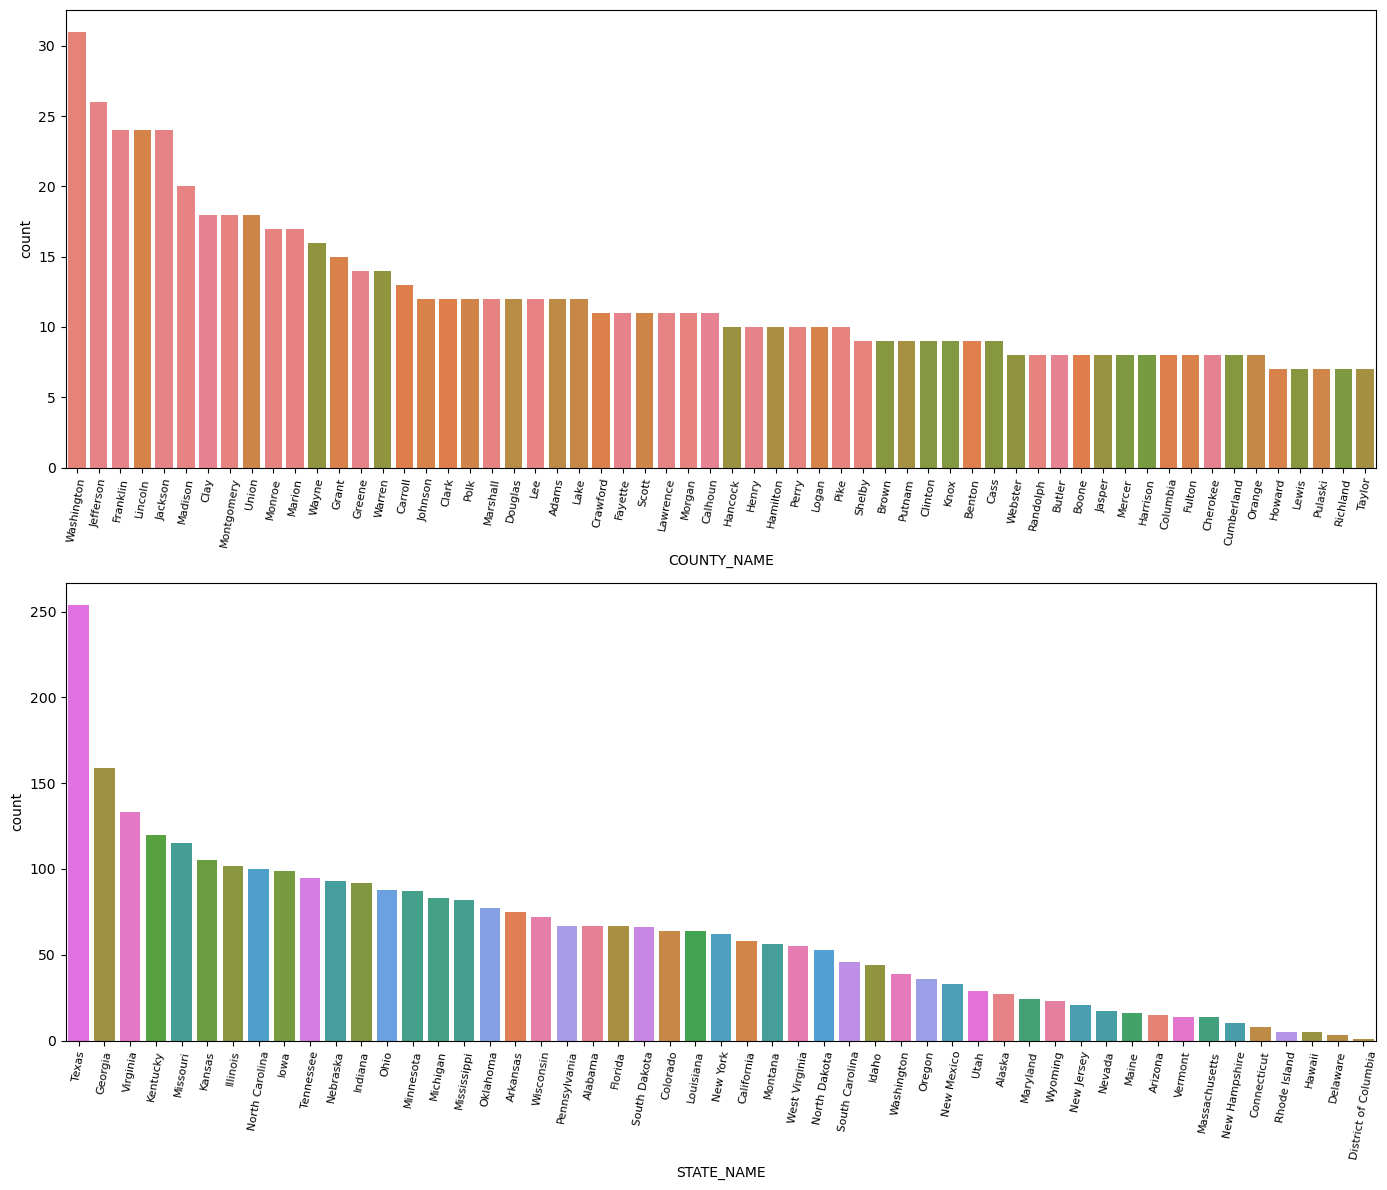

In [88]:
# Frecuency of each category and histogram

fig, axis = plt.subplots(2, 1, figsize = (14, 12))


# Create Histogram (Countplots)


sns.countplot(ax = axis[0], # Variable 'COUNTY_NAME'
                data = filt_df,
                    x = "COUNTY_NAME",
                        hue = "COUNTY_NAME",
                            order = filt_df['COUNTY_NAME'].sort_values().value_counts().index[:60])


sns.countplot(ax = axis[1], # Variable 'STATE_NAME'
                data = filt_df,
                    x = "STATE_NAME",
                        hue = "STATE_NAME",
                            order = filt_df['STATE_NAME'].sort_values().value_counts().index)

# Rotating X-axis labels

for tick in axis:
    tick.set_xticklabels(tick.get_xticklabels(), rotation = 80, fontsize = 8)

plt.tight_layout()

plt.show()

- ### 3.1 Analysis of numerical variables

In [89]:
numerical_var_int = []
numerical_var_float = []

for column in filt_df: 

    if (filt_df[column].dtype == 'int64') :

        numerical_var_int.append(column)

    elif (filt_df[column].dtype == 'float64'):

        numerical_var_float.append(column)

print('============================================')
print(f"Numerical (int) Variables are:\n\n{numerical_var_int}\n\nTotal = {len(numerical_var_int)}")
print('============================================')
print(f"Numerical (float64) Variables are:\n\n{numerical_var_float}\n\nTotal = {len(numerical_var_float)}")
print('============================================')

Numerical (int) Variables are:

['fips', 'TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone_pop', 'Black-alone_pop', 'Native_American/American_Indian-alone_pop', 'Asian-alone_pop', 'Hawaiian/Pacific_Islander-alone_pop', 'Two_or_more_races_pop', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'Less_than_a_high_school_diploma_2014-18', 'High_school_diploma_only_2014-18', "Some_college_or_associate's_degree_2014-18", "Bachelor's_degree_or_higher_2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'ICU_Beds_x', 'Total_Population', 'Population_Aged_60+', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18_and_older', 'anycondition_number', 'Obesity_number', 'Heart_disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code']

Total = 45
Numerical (float64) Variables are:

['R_birth_2018', 'R

## Step 4: Analysis of multivariate variables



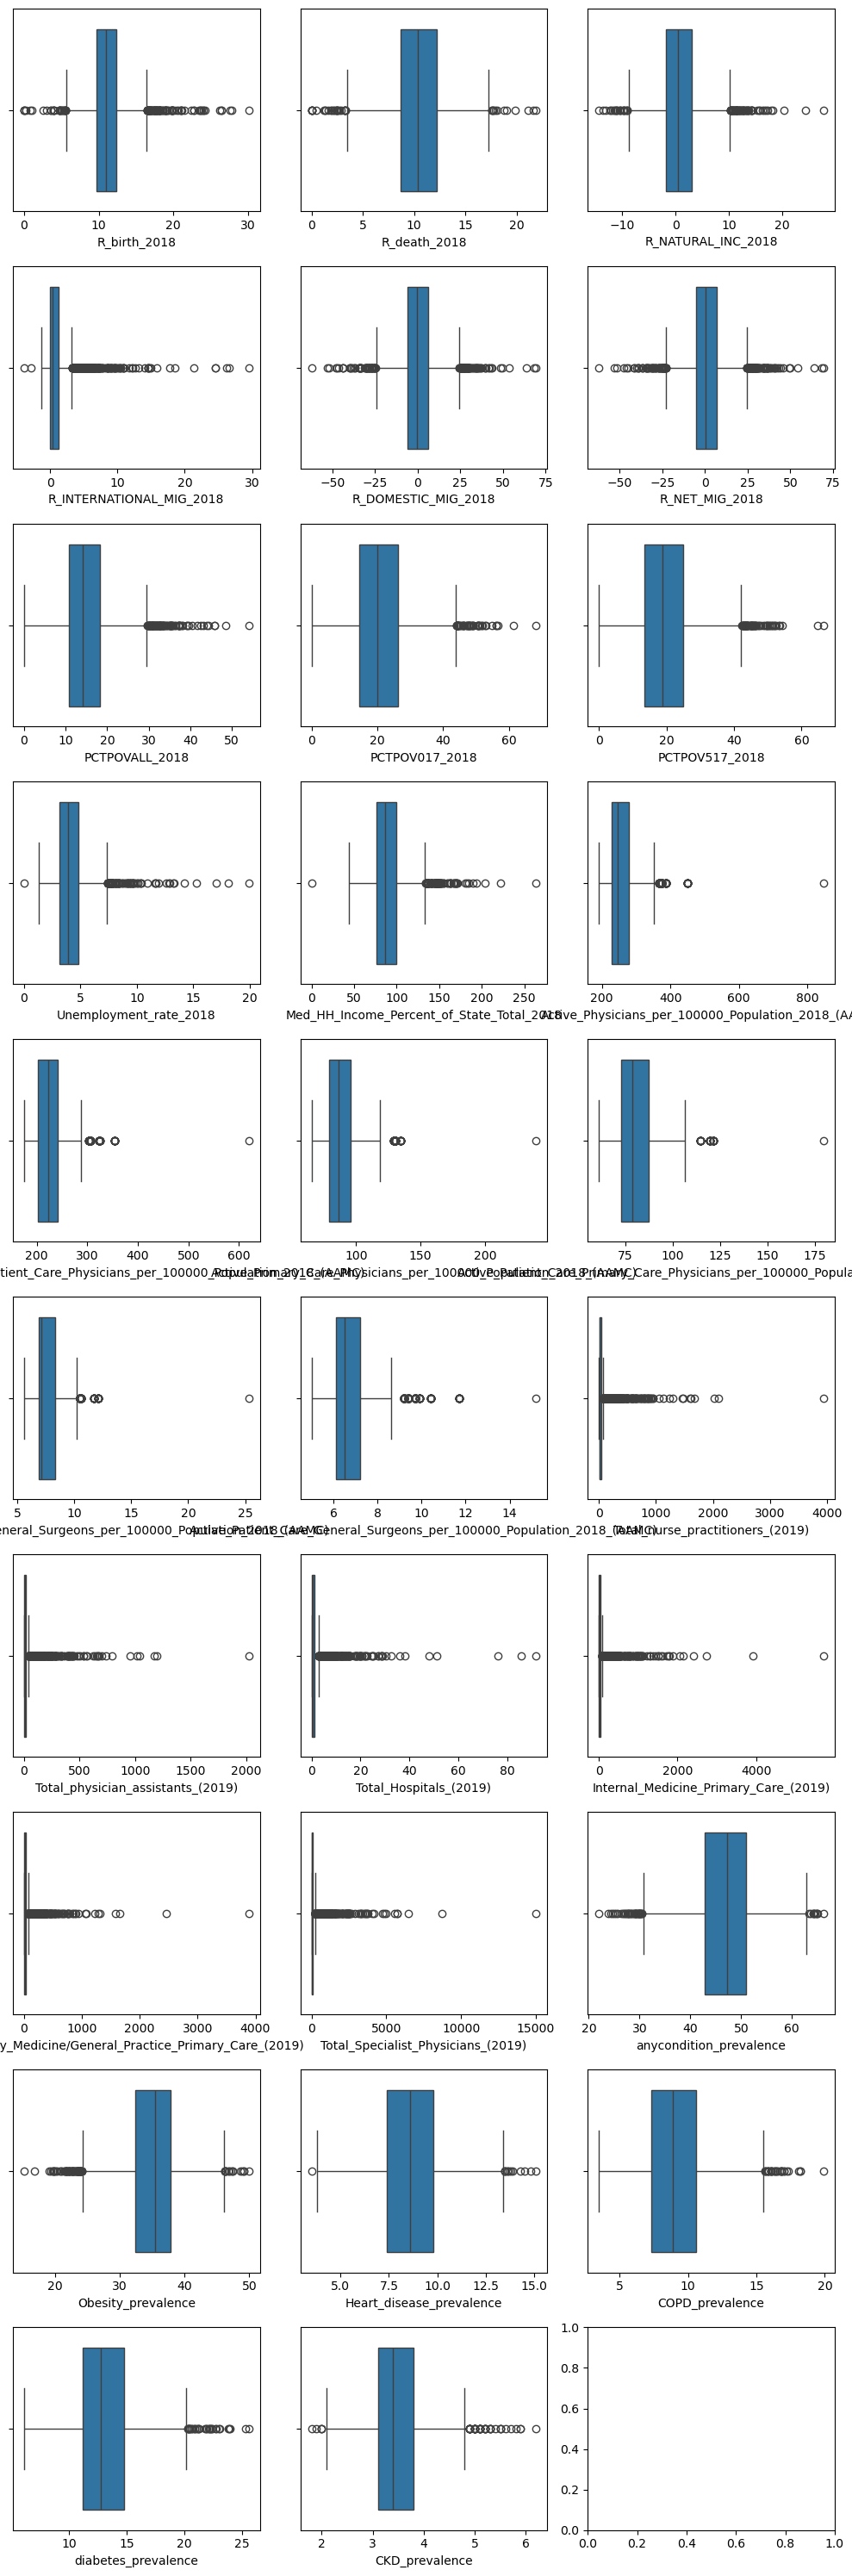

In [92]:
fig, ax = plt.subplots(10,3, figsize=(10, 30))

row, col = 0, 0
for each in numerical_var_float:
    sns.boxplot(ax = ax[row,col], data = filt_df, x=each)
    col += 1
    if col == 3: 
        row += 1 
        col = 0

plt.tight_layout()
plt.show()

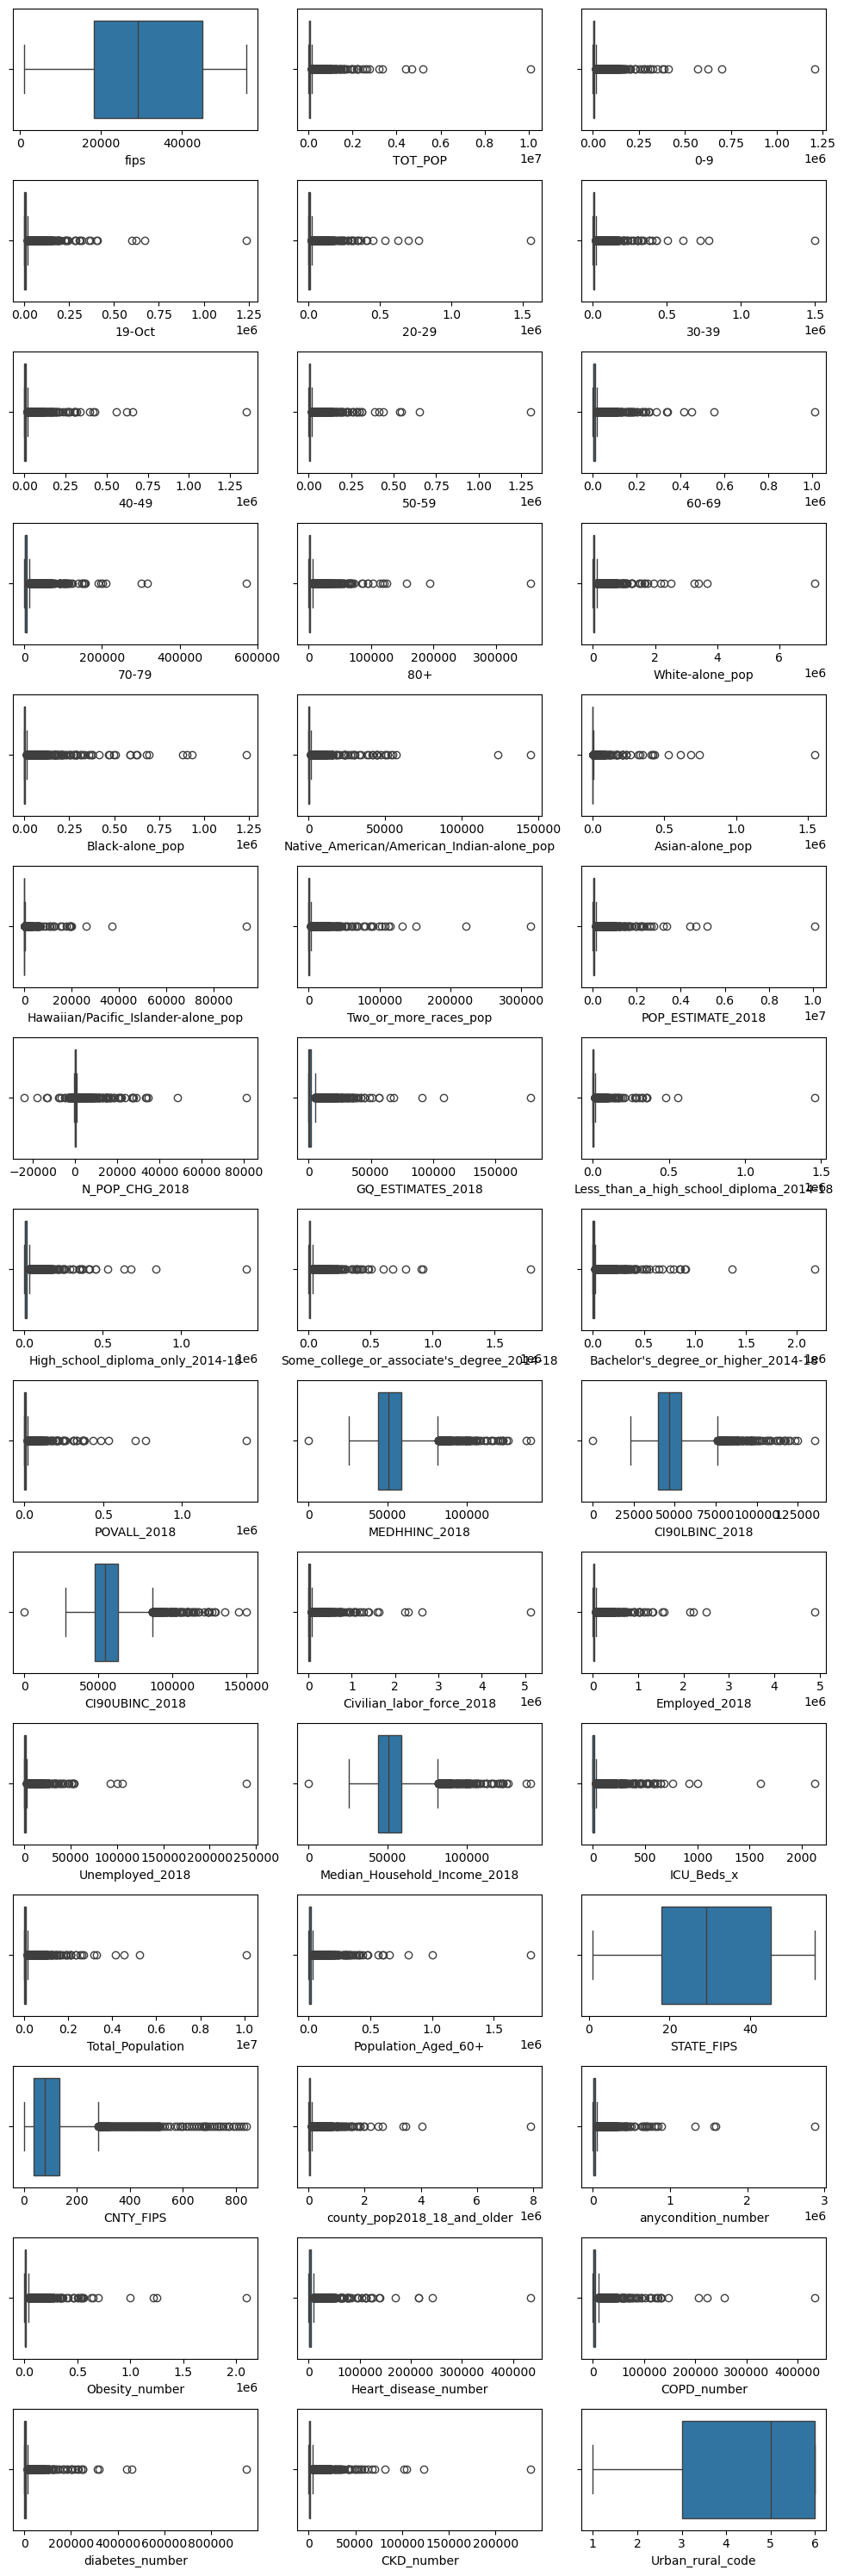

In [94]:
fig, ax = plt.subplots(15,3, figsize=(10, 30))

row, col = 0, 0
for each in numerical_var_int:
    sns.boxplot(ax = ax[row,col], data = filt_df, x=each)
    col += 1
    if col == 3: 
        row += 1 
        col = 0

plt.tight_layout()
plt.show()

In [ ]:
fig, axis = plt.subplots(3, 2,
                            figsize = (10, 18),
                                gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1]})


# ==========================Variable duration==========================
sns.histplot(ax = axis[0, 0],
                data = filt_df[filt_df['duration']<1500], # take values < 1500 because the rest of the values are scattered 
                    x = "duration").set(ylabel = None)

sns.boxplot(ax = axis[1, 0],
                data = filt_df,
                     x = "duration")


# ==========================Variable campaign==========================
sns.histplot(ax = axis[0, 1],
                data = filt_df[filt_df['campaign'] < 20], # take values < 20 because the rest of the values are scattered 
                     x = "campaign")

sns.boxplot(ax = axis[1, 1],
                data = filt_df, 
                     x = "campaign")


# ==========================Variable previous===========================
sns.histplot(ax = axis[2, 0],
                data = filt_df, 
                    x = "previous").set(ylabel = None)

sns.boxplot(ax = axis[3, 0],
                data = filt_df,
                    x = "previous")

- ### 4.4 From string to numerical transformation --> JSON saving

In [90]:
# Encoding Variables

def encoding(dataset, variable, json_path):

    factorize = pd.factorize(dataset[variable])

    parsing_dict = {}

    indexes = factorize[1]

    set_factor = list(set(factorize[0]))

    for index in range(len(factorize[1])):
        parsing_dict.update({indexes[index]: int(set_factor[index])})

    with open(json_path, "w") as f:
        json.dump(parsing_dict, f)
        

In [91]:
# Opening Variables

def open_encoded_var(dataset, variable, json_path):

    with open(json_path, "r") as f:
        job_dict = json.load(f)

    dataset[variable] = dataset[variable].apply(lambda x: job_dict.get(x))

In [96]:
total_stats = filt_df.describe()

total_stats

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart_disease_prevalence,Heart_disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
count,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,...,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000,3140.000
mean,30401.641,104189.412,12740.303,13367.977,14469.332,13916.490,12885.214,13638.032,11916.213,7220.311,...,25276.132,8.608,5597.593,9.095,5827.242,13.074,9326.578,3.446,2466.234,4.635
std,15150.559,333583.395,41807.302,42284.392,49577.725,48990.952,43472.190,42720.629,34518.582,20287.498,...,74466.835,1.759,15615.285,2.345,15720.552,2.724,29754.601,0.568,7730.422,1.510
min,1001.000,88.000,0.000,0.000,0.000,11.000,4.000,14.000,20.000,6.000,...,25.000,3.500,7.000,3.500,7.000,6.100,11.000,1.800,3.000,1.000
25%,18180.500,10963.250,1280.500,1374.500,1263.750,1232.750,1245.250,1483.000,1476.500,950.750,...,3075.000,7.400,798.500,7.300,815.000,11.200,1187.750,3.100,314.750,3.000
50%,29178.000,25800.500,3057.000,3274.000,3108.000,3000.500,3048.500,3515.500,3410.000,2177.000,...,7182.500,8.600,1814.500,8.900,1963.500,12.800,2743.000,3.400,718.000,5.000
75%,45081.500,67913.000,8097.000,8822.250,8976.250,8314.250,8120.500,9157.250,8710.500,5574.000,...,18542.500,9.800,4376.000,10.600,4727.000,14.800,6679.250,3.800,1776.250,6.000
max,56045.000,10105518.000,1208253.000,1239139.000,1557073.000,1501844.000,1350076.000,1306003.000,1014325.000,572530.000,...,2097906.000,15.100,434790.000,19.900,434075.000,25.600,952335.000,6.200,237766.000,6.000


In [97]:
# Save Outliers

def def_outliers(total_stats, variable, json_file):

    individual_stats = total_stats[variable] # Save the stats for IQR

    iqr = individual_stats["75%"] - individual_stats["25%"]
    upper_limit = individual_stats["75%"] + (2 * iqr) 
    lower_limit = individual_stats["25%"] - (2 * iqr)

    if (lower_limit < 0): lower_limit = 0

    print(f"\nThe upper_limit of Variable {variable} is {round(upper_limit, 3)}, the lower_limit is {round(lower_limit, 3)} and the IQR is {round(iqr, 3)}")
    print('                      ==========================================                  ')
    with open(json_file, "w") as f:
        json.dump({
            "upper_limit": upper_limit,
            "lower_limit": lower_limit
        }, f)

In [98]:
def_outliers(total_stats, "GQ_ESTIMATES_2018", "../data/interim/outliers_GQ_ESTIMATES_2018.json")


The upper_limit of Variable GQ_ESTIMATES_2018 is 6384.75, the lower_limit is 0 and the IQR is 2070.0
